In [1]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

zsh:1: no matches found: https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0


In [2]:
!unzip dataset.zip?dl=0

zsh:1: no matches found: dataset.zip?dl=0


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

In [14]:
base_model = MobileNet( input_shape=(224,224,3), include_top= False )

In [5]:
for layer in base_model.layers:
  layer.trainable = False

In [15]:
x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

model = Model(base_model.input, x)

In [16]:
base_model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_2')>

In [17]:
base_model.output

<KerasTensor: shape=(None, 7, 7, 1024) dtype=float32 (created by layer 'conv_pw_13_relu')>

In [18]:
x

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_1')>

In [19]:
model

In [20]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [21]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)


In [22]:
train_datagen

In [23]:
train_data = train_datagen.flow_from_directory(directory= "/Users/purvansh/Downloads/Emotion-detection-main/dataset/train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )

Found 28709 images belonging to 7 classes.


In [24]:
train_data

In [25]:
train_data.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [26]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/Users/purvansh/Downloads/Emotion-detection-main/dataset/test", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


In [27]:
t_img , label = train_data.next()

In [29]:
label

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
 

In [30]:
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

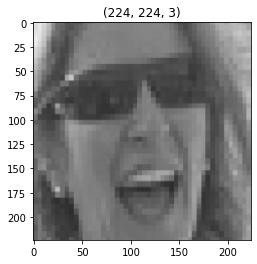

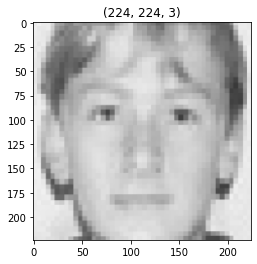

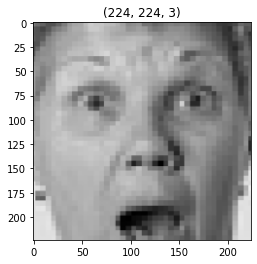

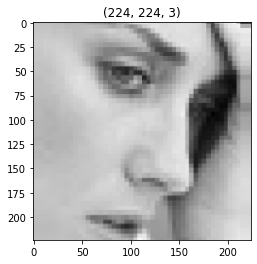

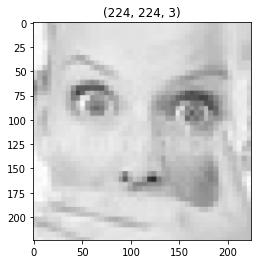

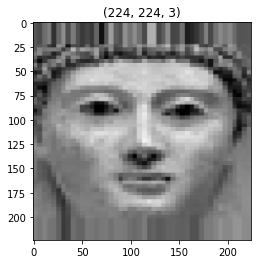

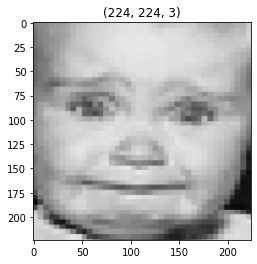

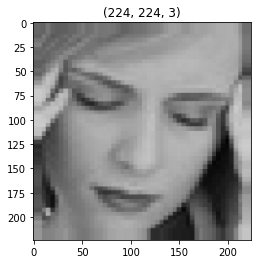

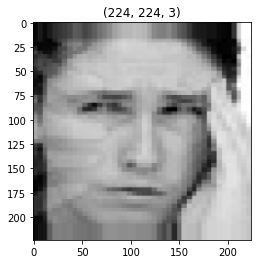

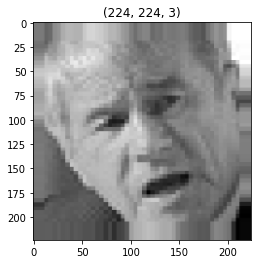

In [31]:
plotImages(t_img, label)

In [46]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 20, verbose= 1, mode='auto')

In [47]:
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')


In [48]:
call_back = [es, mc]

In [60]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 20, 
                           epochs= 100, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

/var/folders/4w/x9pzbvxn5gq7qtzqly_5mxg00000gn/T/ipykernel_64354/2299692419.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/100


2022-01-02 20:44:12.924860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - ETA: 0s - loss: 1.4008 - accuracy: 0.5141

2022-01-02 20:44:21.446678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy did not improve from 0.49219
20/20 [==============================] - 10s 430ms/step - loss: 1.4008 - accuracy: 0.5141 - val_loss: 2.2854 - val_accuracy: 0.4219
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 1.3983 - accuracy: 0.4703
Epoch 00002: val_accuracy did not improve from 0.49219
20/20 [==============================] - 8s 411ms/step - loss: 1.3983 - accuracy: 0.4703 - val_loss: 2.0380 - val_accuracy: 0.4414
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 1.3329 - accuracy: 0.5125
Epoch 00003: val_accuracy improved from 0.49219 to 0.50391, saving model to best_model.h5
20/20 [==============================] - 9s 425ms/step - loss: 1.3329 - accuracy: 0.5125 - val_loss: 1.6273 - val_accuracy: 0.5039
Epoch 4/100
20/20 [==============================] - ETA: 0s - loss: 1.3317 - accuracy: 0.5172
Epoch 00004: val_accuracy improved from 0.50391 to 0.51562, saving model to best_model.h5
20/20 [=======================

Epoch 30/100
20/20 [==============================] - ETA: 0s - loss: 1.1738 - accuracy: 0.5500
Epoch 00030: val_accuracy did not improve from 0.59766
20/20 [==============================] - 8s 408ms/step - loss: 1.1738 - accuracy: 0.5500 - val_loss: 1.2985 - val_accuracy: 0.5234
Epoch 31/100
20/20 [==============================] - ETA: 0s - loss: 1.1313 - accuracy: 0.5672
Epoch 00031: val_accuracy did not improve from 0.59766
20/20 [==============================] - 8s 408ms/step - loss: 1.1313 - accuracy: 0.5672 - val_loss: 1.1521 - val_accuracy: 0.5977
Epoch 32/100
20/20 [==============================] - ETA: 0s - loss: 1.1252 - accuracy: 0.5750
Epoch 00032: val_accuracy did not improve from 0.59766
20/20 [==============================] - 8s 408ms/step - loss: 1.1252 - accuracy: 0.5750 - val_loss: 1.1872 - val_accuracy: 0.5273
Epoch 33/100
20/20 [==============================] - ETA: 0s - loss: 1.1146 - accuracy: 0.5797
Epoch 00033: val_accuracy improved from 0.59766 to 0.62500

In [61]:
from keras.models import load_model
model = load_model("/Users/purvansh/Downloads/Emotion-detection-main/best_model.h5")

In [62]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [63]:
h

{'loss': [1.4007682800292969,
  1.3982938528060913,
  1.3328890800476074,
  1.331671118736267,
  1.2961549758911133,
  1.2753742933273315,
  1.2784548997879028,
  1.2466634511947632,
  1.2914992570877075,
  1.1806491613388062,
  1.2836145162582397,
  1.2860931158065796,
  1.2017102241516113,
  1.3052324056625366,
  1.2500752210617065,
  1.2658275365829468,
  1.286847710609436,
  1.186115026473999,
  1.2253159284591675,
  1.1791802644729614,
  1.250258445739746,
  1.1641589403152466,
  1.2617911100387573,
  1.210013508796692,
  1.1600455045700073,
  1.1830646991729736,
  1.1462186574935913,
  1.1700786352157593,
  1.1763054132461548,
  1.1738390922546387,
  1.1313039064407349,
  1.125223159790039,
  1.1146003007888794,
  1.1006718873977661,
  1.1105738878250122,
  1.1451414823532104,
  1.1719318628311157,
  1.124021291732788,
  1.0385464429855347,
  1.0882333517074585,
  1.1718658208847046,
  1.106330156326294,
  1.159792423248291,
  1.0825682878494263,
  1.0940254926681519,
  1.1560925

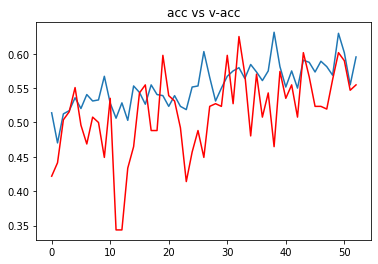

In [64]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

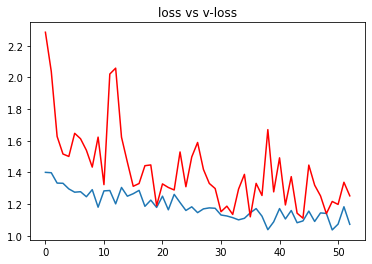

In [65]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [66]:
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

In [67]:
op

{0: 'angry',
 1: 'disgust',
 2: 'fear',
 3: 'happy',
 4: 'neutral',
 5: 'sad',
 6: 'surprise'}

In [68]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

 the image is of sad


2022-01-02 21:09:22.644479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


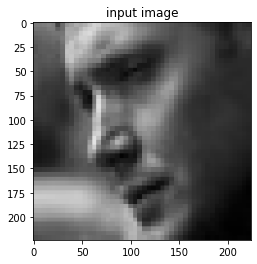

In [69]:
# path for the image to see if it predics correct class

path = "/Users/purvansh/Downloads/Emotion-detection-main/dataset/test/angry/PrivateTest_1054527.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

In [70]:
hist